<a href="https://colab.research.google.com/github/20yeison01/practicasDeQuimica/blob/main/cinetica_termodinamica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>
<br>
<br>
<br>
<br>

<font size='6' style="color:#00A6D6">  <b>Cinética y Termodinámica</b> </font>
<a name="loading"></a>

<font size='4' style="color:#00A6D6">  <b>Jesus Alvarado-Huayhuaz

</b> </font>
<a name="loading"></a>

## [1] Instalación de librerías

In [233]:
  %%capture
  !pip install rdkit
  !pip install pyscf

In [234]:
# Importamos librerías
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True
from pyscf import gto, scf

## [2] Estructuras

### Isómero CIS

In [236]:
# representación SMILES del isómero CIS
smi_cis = "O(C(=O)[H])[H]"
# elemento de RDKit
cis = Chem.MolFromSmiles(smi_cis)
# agregamos sus hidrógenos
cis = Chem.AddHs(cis)
# etiquetamos sus átomos y generamos sus coordenadas usando una semilla
Chem.AllChem.EmbedMolecule(cis, useRandomCoords=False,randomSeed=1234)
# guardamos a un archivo XYZ
Chem.MolToXYZFile(cis, "cis.xyz")

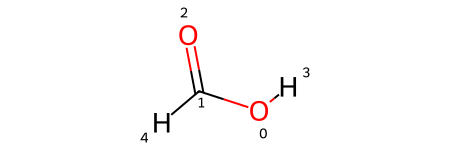

In [237]:
#visualizamos
cis

In [238]:
# visualizamos las coordenadas en el archivo XYZ
!cat cis.xyz

5

O      0.865201   -0.466197    0.230670
C     -0.441729   -0.042292    0.061021
O     -0.675289    1.181715    0.110647
H      1.502860    0.054160    0.852485
H     -1.251043   -0.727386   -0.110010


### Isómero TRANS

In [239]:
smi_trans = "O(C(=O)[H])[H]"
trans = Chem.MolFromSmiles(smi_trans)
trans = Chem.AddHs(trans)
Chem.AllChem.EmbedMolecule(trans, useRandomCoords=False,randomSeed=1234)
Chem.MolToXYZFile(trans, "trans.xyz")

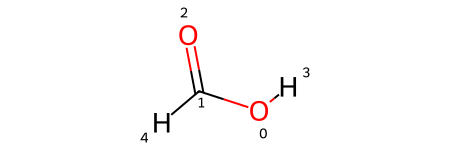

In [240]:
trans

In [241]:
!cat trans.xyz

5

O      0.865201   -0.466197    0.230670
C     -0.441729   -0.042292    0.061021
O     -0.675289    1.181715    0.110647
H      1.502860    0.054160    0.852485
H     -1.251043   -0.727386   -0.110010


### Diedro = 90.0 º

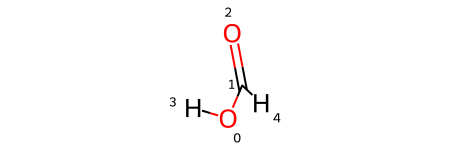

In [242]:
Chem.AllChem.SetDihedralDeg(cis.GetConformer(0),3,2,1,0,90.0)
Chem.MolToXYZFile(cis, "diedro90.xyz")
cis

In [243]:
!cat diedro90.xyz

5

O     -0.770885   -0.816099    1.160757
C     -0.441729   -0.042292    0.061021
O     -0.675289    1.181715    0.110647
H     -1.587577   -0.571590    1.741502
H      0.003393   -0.459106   -0.823133


## [3] Cálculo de energía

### CIS

In [244]:
cis = gto.M(atom="cis.xyz")

In [245]:
cis.basis = "6-31G"
mf_cis = cis.KS()
mf_cis.xc = 'b3lyp'

In [246]:
resultado_cis = mf_cis.kernel()
resultado_cis

converged SCF energy = -187.124899157471


-187.12489915747074

### Diedro 90

In [247]:
cis_90 = gto.M(atom="diedro90.xyz")

In [248]:
cis_90.basis = "6-31G"
mf_90 = cis_90.KS()
mf_90.xc = 'b3lyp'

In [249]:
resultado_cis_90 = mf_90.kernel()
resultado_cis_90

converged SCF energy = -187.124898824245


-187.1248988242454

### TRANS

In [250]:
trans = gto.M(atom="trans.xyz")

In [251]:
trans.basis = "6-31G"
mf_trans = trans.KS()
mf_trans.xc = 'b3lyp'

In [252]:
resultado_trans= mf_trans.kernel()
resultado_trans

converged SCF energy = -187.124899157471


-187.12489915747074

## 4. Gráfica

In [253]:
%%capture
!pip install git+https://github.com/giacomomarchioro/PyEnergyDiagrams

In [254]:
import matplotlib.pyplot as plt
from energydiagram import ED

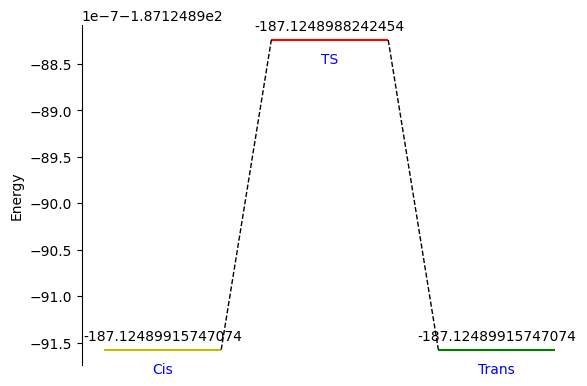

In [255]:
diagram = ED()
diagram.add_level(resultado_cis,'Cis',color='y')
diagram.add_level(resultado_cis_90,'TS',color='r')
diagram.add_level(resultado_trans,'Trans',color='g')

diagram.add_link(0,1)
diagram.add_link(1,2)
diagram.plot(ylabel="Energy") # / $kcal$ $mol^{-1}$")

## Cinética:

In [256]:
E_activacion = resultado_cis_90 - resultado_cis
E_activacion

3.3322532999591203e-07

## Termodinámica

In [257]:
entalpia = resultado_trans - resultado_cis
if entalpia>0:
  print("La reacción es endotérmica")
else:
    print("La reacción es exotérmica")

La reacción es exotérmica
